You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.
In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
df.columns = map(str.lower, df.columns)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df['year_of_release'].isnull().sum()

269

Need to convert year of release column to integer (can't have a portion of a year), but must replace the NaNs first.

In [6]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


There were a large amount of NaN values in year of release. Converted unknowns to -1 for easy filtering. There must be data somewhere for the missing release years, as each game must have a year it was released. Would send back to data engineers or ask them to cross-reference missing years with known data from another source.

In [7]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
9.6       2
0.2       2
0.9       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [8]:
df['user_score'].isnull().sum()

6701

Lots of NaN entries and 'tbd' entries in user_score. Would be nice to manipulate user score column as numeric for comparisons.

In [9]:
df['user_score'] = df['user_score'].fillna(-1)
df['user_score'].value_counts()

-1     6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
0.2       2
9.6       2
1.3       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

In [10]:
df['user_score'] = df['user_score'].replace(to_replace='tbd', value=-1)
df['user_score'].value_counts()

-1     9125
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.5       2
0.2       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [11]:
df['user_score'] = df['user_score'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         16715 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Replaced NaN and 'tbd' entries as -1. This allows me to manipulate the column as numeric, while keeping the NaN from influencing the statistics of the row. TBD is interpreted as To Be Determined, meaning there is probably a review coming, but as of now, there is none, so it will be ignored.

In [12]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [13]:
df['rating'].fillna('none', inplace=True)
df['rating'].value_counts()

none    6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Most ratings appear to be under E, T, M, and E10+, with a small handful of outliers using other rating labels. No need to adjust. Filled NaN with 'none'.

In [14]:
df['total_sales'] = (df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'])
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,none,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,none,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,-1.0,none,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,-1.0,none,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,-1.0,none,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,-1.0,none,0.01


In [15]:
df['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: int64

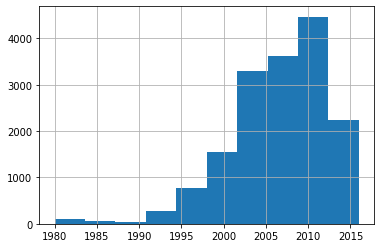

In [16]:
df['year_of_release'].hist()

In [17]:
df['year_of_release'].describe()

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

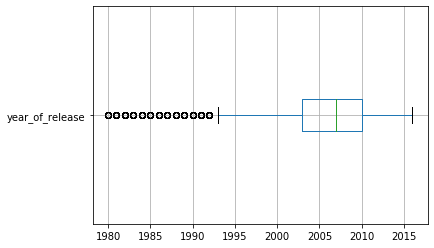

In [18]:
df.boxplot(column='year_of_release', vert=False)

We can see that a lot more games were published post 1995 than previously. We will probably get more accurate data from a larger sample size, looking at games published post 1995. The boxplot shows us that we have outliers trending to the lower end of year ranges.

New dataframe created with only the games from 1995 on, as was determined relevant earlier.

In [19]:
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

In [20]:
platform_total_counts = df.groupby('platform')['year_of_release'].count()
platform_total_counts.sort_values(ascending=False)

platform
PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: year_of_release, dtype: int64

In [21]:
platform_high_counts = platform_total_counts.sort_values(ascending=False).head(10).index
platform_high_counts

Index(['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'GBA', 'XB'], dtype='object', name='platform')

In [22]:
top_platform_counts= df[df['platform'].isin(platform_high_counts)]
top_platform_counts

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,-1.0,none,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,-1.0,none,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,-1.0,none,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,-1.0,none,0.01


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbafa890310>,
      dtype=object)

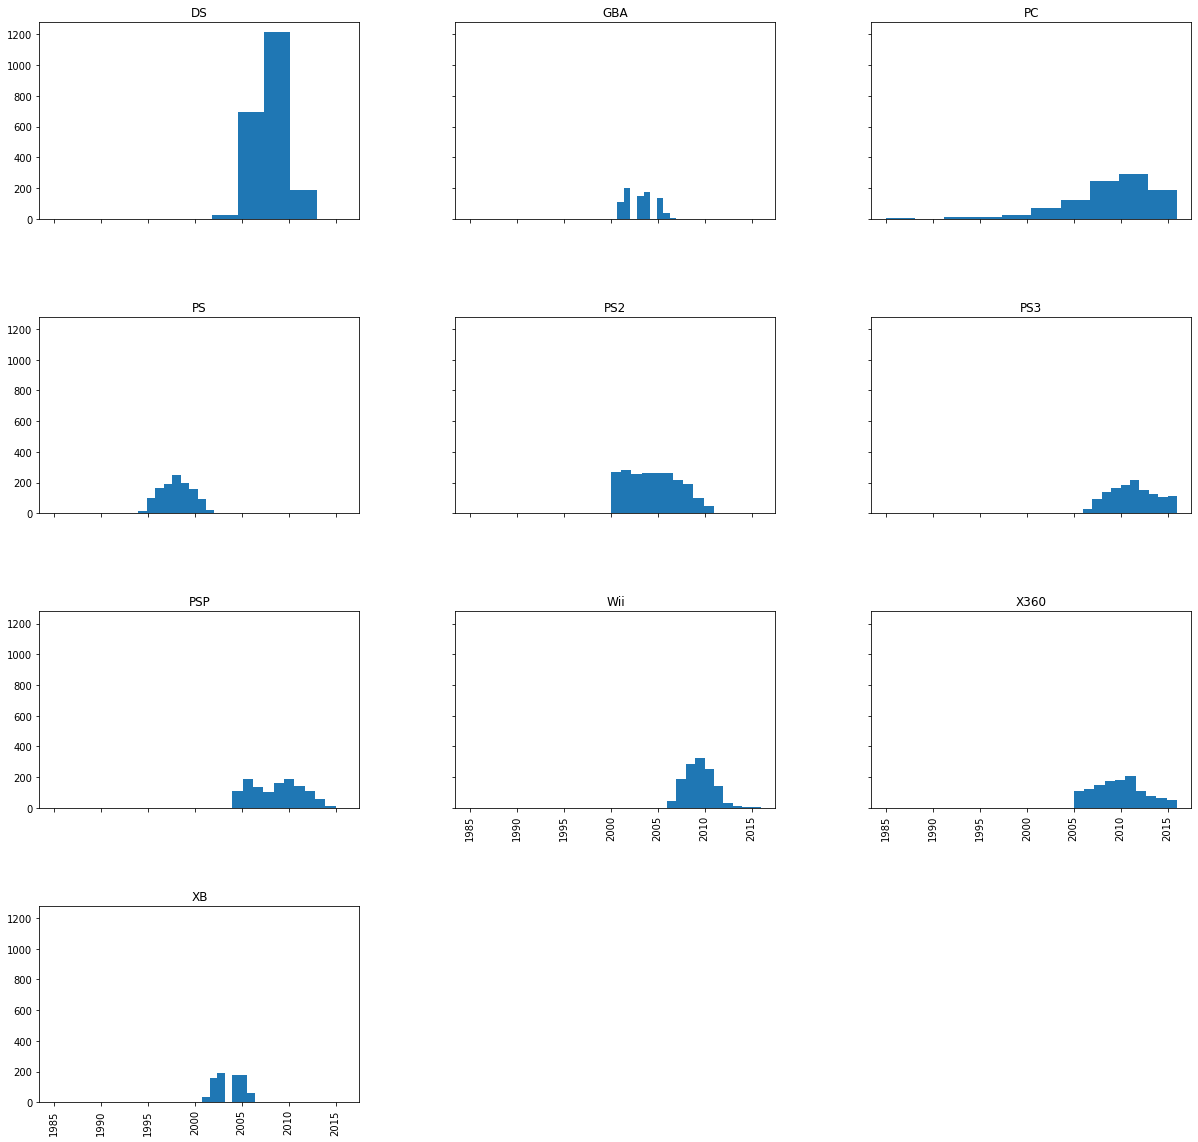

In [23]:
top_platform_counts.hist(column='year_of_release', by='platform', figsize=(20,20), sharex=True, sharey=True)

Looking at the histograms for the top 10 platforms shows us relations between the different platforms. For example, there is an odd break in the middle of xbox games. You can easily see the progression from playstation 1-3, and how as the new system is introduced, less games are made for the old platform. Nintendo DS also has far and away the most games published, especially in the span from 2005-2010.

In [24]:
df_platform_stats_years = df.groupby('platform')['year_of_release'].describe()
df_platform_stats_years

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
2600,116.0,1982.137931,1.990834,1980.0,1981.00,1982.0,1982.00,1989.0
3DO,3.0,1994.666667,0.577350,1994.0,1994.50,1995.0,1995.00,1995.0
3DS,512.0,2013.126953,1.647359,2011.0,2012.00,2013.0,2015.00,2016.0
DC,52.0,1999.942308,1.808623,1998.0,1999.00,2000.0,2000.00,2008.0
DS,2121.0,2008.185290,1.778565,1985.0,2007.00,2008.0,2009.00,2013.0
GB,97.0,1995.958763,4.178111,1988.0,1992.00,1997.0,2000.00,2001.0
GBA,811.0,2003.210851,1.474451,2000.0,2002.00,2003.0,2004.00,2007.0
GC,542.0,2003.400369,1.391896,2001.0,2002.00,2003.0,2005.00,2007.0
GEN,29.0,1993.034483,1.051623,1990.0,1992.00,1993.0,1994.00,1994.0


In [25]:
df_platform_stats_years['iqr'] = df_platform_stats_years['75%'] - df_platform_stats_years['25%']
df_platform_stats_years

,count,mean,std,min,25%,50%,75%,max,iqr
platform,,,,,,,,,
2600,116.0,1982.137931,1.990834,1980.0,1981.00,1982.0,1982.00,1989.0,1.0
3DO,3.0,1994.666667,0.577350,1994.0,1994.50,1995.0,1995.00,1995.0,0.5
3DS,512.0,2013.126953,1.647359,2011.0,2012.00,2013.0,2015.00,2016.0,3.0
DC,52.0,1999.942308,1.808623,1998.0,1999.00,2000.0,2000.00,2008.0,1.0
DS,2121.0,2008.185290,1.778565,1985.0,2007.00,2008.0,2009.00,2013.0,2.0
GB,97.0,1995.958763,4.178111,1988.0,1992.00,1997.0,2000.00,2001.0,8.0
GBA,811.0,2003.210851,1.474451,2000.0,2002.00,2003.0,2004.00,2007.0,2.0
GC,542.0,2003.400369,1.391896,2001.0,2002.00,2003.0,2005.00,2007.0,3.0
GEN,29.0,1993.034483,1.051623,1990.0,1992.00,1993.0,1994.00,1994.0,2.0


In [26]:
df_platform_stats_years.sort_values('iqr', ascending=False)

,count,mean,std,min,25%,50%,75%,max,iqr
platform,,,,,,,,,
GB,97.0,1995.958763,4.178111,1988.0,1992.00,1997.0,2000.00,2001.0,8.0
PS2,2127.0,2004.583921,2.567689,2000.0,2002.00,2005.0,2007.00,2011.0,5.0
PC,957.0,2008.914316,4.643006,1985.0,2007.00,2010.0,2012.00,2016.0,5.0
PSP,1193.0,2008.731769,2.434057,2004.0,2006.00,2009.0,2011.00,2015.0,5.0
NES,98.0,1987.153061,2.793040,1983.0,1985.00,1986.5,1989.00,1994.0,4.0
PS3,1306.0,2010.840735,2.459616,2006.0,2009.00,2011.0,2013.00,2016.0,4.0
3DS,512.0,2013.126953,1.647359,2011.0,2012.00,2013.0,2015.00,2016.0,3.0
X360,1232.0,2009.880682,2.458339,2005.0,2008.00,2010.0,2011.00,2016.0,3.0
GC,542.0,2003.400369,1.391896,2001.0,2002.00,2003.0,2005.00,2007.0,3.0


In [27]:
df_platform_stats_years['iqr'].mean()

2.225806451612903

In [28]:
df_platform_stats_years['iqr'].median()

2.0

I looked at the IQR for the range of each platform to get an idea of how long they were popular. Using the IQR eliminates some of the outliers and somewhat normalizes the data between platforms, ignoring the very first releases (when customers might not have the system yet), and the last releases (when customers may have moved on). This means that we are looking at the length of the height of popularity for each platform. 

The mean and median for the IQRs are fairly close, meaning that it's close to a normal distribution. It looks like the GameBoy skews the data a bit, because its IQR is 8 years, while the other platforms range from 0-5 years. 

In [29]:
platforms_total_sales = df.groupby('platform')['total_sales'].sum()
platforms_total_sales.sort_values(ascending=False)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [30]:
platform_high_sales = platforms_total_sales.sort_values(ascending=False).head(10).index
platform_high_sales

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC'], dtype='object', name='platform')

In [31]:
top_platforms_sales = df[df['platform'].isin(platform_high_sales)]
top_platforms_sales

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,-1.0,none,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,-1.0,none,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,-1.0,none,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,-1.0,none,0.01


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbafa446250>,
      dtype=object)

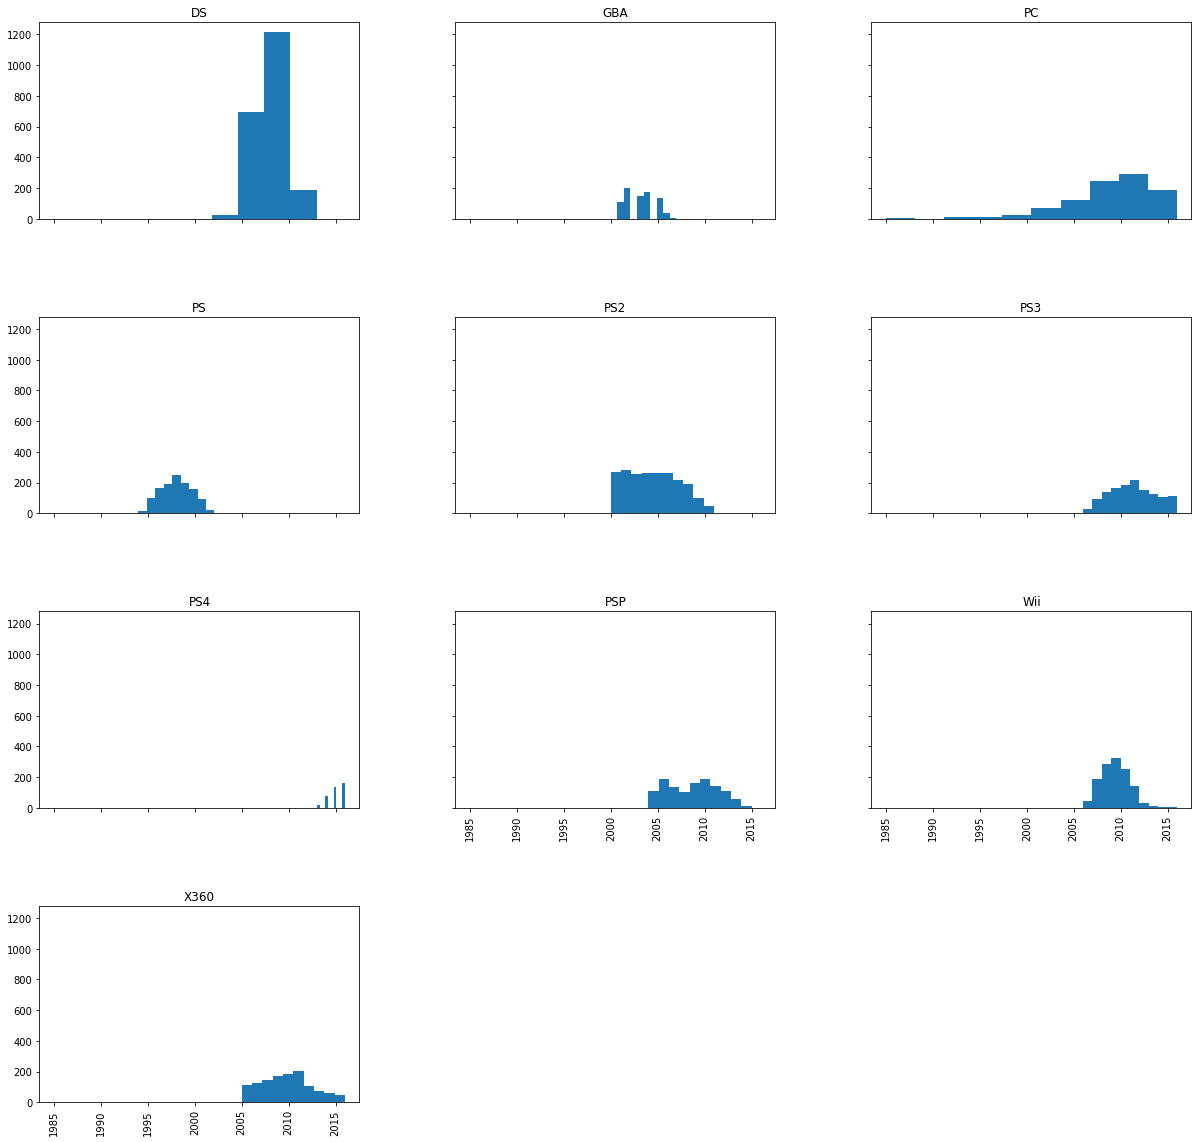

In [32]:
top_platforms_sales.hist(column='year_of_release', by='platform', figsize=(20,20), sharex=True, sharey=True)

Interesting to note that Xbox was replaced by PS4 when we look at sales amounts. This may mean that PS4 games cost more than Xbox games, resulting in higher sales figures. The rest seems to align with count figures.

Based on amount of entries/data available, and looking at the box and whisker plot of the year of release for games in the dataset, looking at data from 1993-present is more relevant and accurate. This means we are not looking at the outliers, and also looking at data when video games became more popular and mainstream.

Based on the data available, it appears that as of this data being collected, Xbox 360, PS3, PS4, and PC games are the most popular platforms for games. While DS games had previously been massively popular, it appears that they have not sold any games in the past few years. Looking at previous trends of Playstation games, PS4 would be where to invest, as the PS3 games will taper off with the new version out. PC seems to be steadily growing. PSP also seems to be fading in popularity. To sum up, the platforms to invest in now will be PC, PS4, and whichever platforms succeed Xbox 360 and DS.

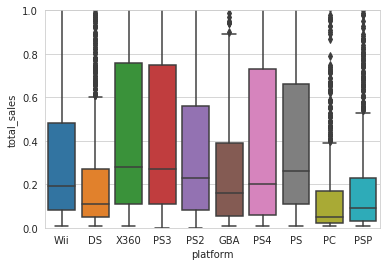

In [33]:
import seaborn as sns
sns.set_style("whitegrid")
plt.ylim(0, 1)
ax = sns.boxplot(x="platform", y="total_sales",              
data=top_platforms_sales)

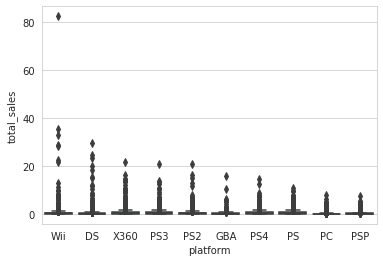

In [34]:
sns.set_style("whitegrid")
ax = sns.boxplot(x="platform", y="total_sales",              
data=top_platforms_sales)

When we look at the data not based on date of release, but just amount of sales, we can see that Xbox 360, PS3, PS4, and PS all seem to be the most profitable. This tracks with what we saw for popularity based on year of release. The Playstation, Xbox, and PC categories are all popular, but with Playstation and Xbox, the popularity moves based on which is the latest console. There are a lot of outliers outside of the whiskers, most notably when we zoom out and look at the Wii. That's why looking at the box graphs helps to focus on where the majority of the data lies.

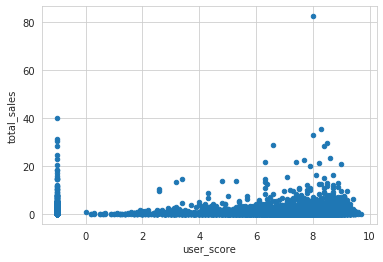

In [35]:
df.plot.scatter(x='user_score', y='total_sales')

In [36]:
df[['user_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,0.135064
total_sales,0.135064,1.000000


In [37]:
user_score_df = df[df['user_score'] > 0]
user_score_df[['user_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,0.088304
total_sales,0.088304,1.000000


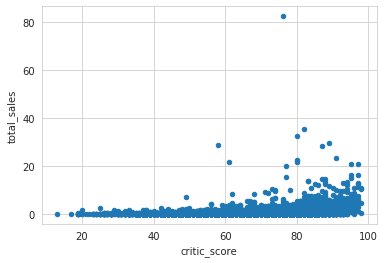

In [38]:
df.plot.scatter(x='critic_score', y='total_sales')

In [39]:
df[['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.245507
total_sales,0.245507,1.000000


Looking at both the scatter plots and the correlation coefficients of the user score and critic score vs the total sales for all games, there is a very weak correlation. What correlation there is is positive, though. The critic score is stronger at .25 vs the .13 or .08 (corrected) correlation for user score. Because I filled the unknown user scores with -1, I created a corrected user score version that excluded any user score that was below 0.

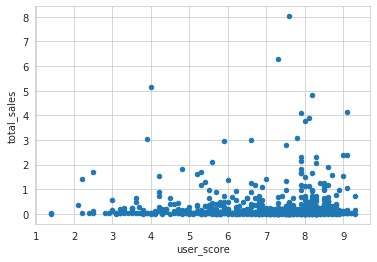

In [40]:
pc = df.query('platform == "PC" & user_score > 0')
pc.plot.scatter(x='user_score', y='total_sales')

In [41]:
pc[['user_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,0.010476
total_sales,0.010476,1.000000


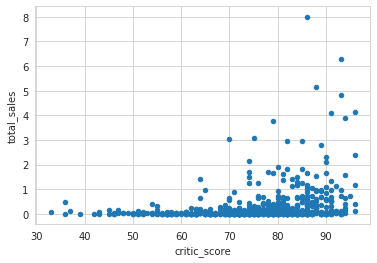

In [42]:
pc.plot.scatter(x='critic_score', y='total_sales')

In [43]:
pc[['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.256409
total_sales,0.256409,1.000000


Looking specifically at just the pc platform, it tracks with what we saw in the overall trends between critic score and user score. Critic scores have a higher correlation with sales.

In [44]:
df.sort_values('total_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,none,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,none,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16181,Sakura Sakura: Haru Urara,PSP,2010,Adventure,0.00,0.00,0.01,0.00,NaN,-1.0,none,0.01
16182,Rocksmith 2014 Edition Remastered,XOne,2016,Misc,0.01,0.00,0.00,0.00,NaN,-1.0,T,0.01
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.00,NaN,-1.0,none,0.01
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.00,NaN,-1.0,none,0.00


The major outlier seems to be Wii Sports. It is interesting that this game has such high sales, as it was bundled with the console with purchase. Would be good to ask data engineers how sales were calculated, possibly as part of the sale price of a Wii in general. The reason this game is such an outlier is probably because it is basically counting every consumer who purchased a Wii.

In [45]:
wii = df.query('platform == "Wii" & user_score > 0')
wii[['user_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,0.112414
total_sales,0.112414,1.000000


In [46]:
wii[['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.169668
total_sales,0.169668,1.000000


Looking at the Wii, there is a fairly weak correlation and not much of a difference between the correlations of user scores and critic scores vs total sales.

In [47]:
ps3 = df.query('platform == "PS3" & user_score > 0')
ps3[['user_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,0.126691
total_sales,0.126691,1.000000


In [48]:
ps3[['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.427875
total_sales,0.427875,1.000000


The PS3 has a much stronger correlation between critic scores and sales than anything we've looked at previously. User scores are on the same level as other platforms, but critic scores seem to have a huge impact on final sale figures for PS3 games.

In [49]:
ds = df.query('platform == "DS" & user_score > 0')
ds[['user_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,0.132938
total_sales,0.132938,1.000000


In [50]:
ds[['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.230941
total_sales,0.230941,1.000000


DS sales are also tied stronger to critic scores, but not nearly to the degree that PS3 sales are.

In [51]:
x360 = df.query('platform == "X360" & user_score > 0')
x360[['user_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,0.114459
total_sales,0.114459,1.000000


In [52]:
x360[['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.389513
total_sales,0.389513,1.000000


Xbox 360 scores trend along the same lines as ps3 scores. User scores do not have a strong correlation, but critic scores have a strong positive correlation between higher ratings and sales. It seems for these platforms, customers are strongly influenced by "official" reviews of a game. Who knows if they end up enjoying it after playing?

In [53]:
df['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

All genres seem to be neatly sorted, no adjustments to be made. 

In [54]:
by_genre = df.groupby('genre')['total_sales'].sum()
by_genre.sort_values(ascending=False)

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: total_sales, dtype: float64

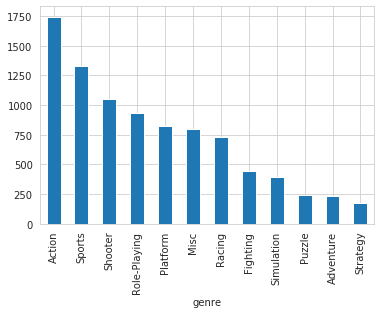

In [55]:
by_genre.sort_values(ascending=False).plot(kind='bar')

We can see that Action, Sports, and Shooter are easily the top 3 genres of games by sales. Puzzle, Adventure, and Strategy are the least profitable. I would guess that there may be more multiplayer/online and thus replayability in Action, Sports, and Shooter games, which may explain why they seem to be such popular sellers.

In [56]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,none,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,none,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,-1.0,none,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,-1.0,none,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,-1.0,none,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,-1.0,none,0.01


In [57]:
df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()

platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

In [58]:
df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()

platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

In [59]:
df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()

platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64

Sorting each platform by region and sales, we can see that Japanese top-selling platforms seem to vary dramatically from NA and EU sales. NA and EU both have differences, but are much more similar to each other. Perhaps this has to do with the culture of where the games are being purchased and played, or even availability of games in certain languages.

In [60]:
df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)

genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

In [61]:
df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)

genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

In [62]:
df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64

When we look at the top selling genres of the three major regions, we can see that Action and Sports are popular among all regions. There is plenty of overlap as well between two of the three regions, in things like Platform, and Shooter. Generally, most areas are interested in the same kinds of games overall.

In [63]:
df['rating'].value_counts()

none    6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [64]:
df.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5)

rating
E       1292.99
none    1242.46
T        759.75
M        748.48
E10+     353.32
Name: na_sales, dtype: float64

In [65]:
df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5)

rating
E       710.25
none    613.83
M       483.97
T       427.03
E10+    188.52
Name: eu_sales, dtype: float64

In [66]:
df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5)

rating
none    841.96
E       198.11
T       151.40
M        64.24
E10+     40.20
Name: jp_sales, dtype: float64

It looks like overall, there is not a large difference between ESRB ratings among regions. E seems to be the most profitable, but it is also the most plentiful rating of game. There is a large amount of unrated games, we can ask engineers to look into missing ratings to flesh out our conclusions.

In [67]:
x360_user_scores = df.query('platform == "X360" & user_score >= 0')['user_score']
pc_user_scores = df.query('platform == "PC" & user_score >= 0')['user_score']

In [68]:
st.ttest_ind(x360_user_scores, pc_user_scores)

Ttest_indResult(statistic=-5.295095474882312, pvalue=1.3412615061266984e-07)

There is a large p-value, much larger than the standard alpha values of .1 or .05, to indicate that there is a difference between Xbox 360 user scores and PC user scores. We cannot accept the hypothesis that their scores are similar. The null hypothesis assumes no change, no difference between scores, therefore the alternative is that there is a significant difference.

In [69]:
action_user_scores = df.query('genre == "Action" & user_score >= 0')['user_score']
sports_user_scores = df.query('genre == "Sports" & user_score >= 0')['user_score']

st.ttest_ind(action_user_scores, sports_user_scores)

Ttest_indResult(statistic=1.6259419280500857, pvalue=0.10406951359049141)

As above, the null hypothesis is that there is no change or difference between the scores of the two genres. In this dataset, the p-value is small. I will choose an alpha-value of .1 to be conservative, and say that there is no difference between scores on the two genres. Because the p-value is right on .1, it seems to be a better idea to use .1 as our alpha threshold. Because of all of this, we must accept the null hypothesis that ther is no difference of scores between the two genres.

# Overall Conclusion

One of the main conclusions we can draw from this dataset is that video game platforms exist in a situation where platforms are constantly being updated. The only exemption from this is PC, as that basically covers a wide range of type of platforms, which are customizeable and upgradeable, while consoles and handhelds need to be upgraded by new releases from the producers. Because of this, it would be smart to focus on the lines of products, for example, Playstation, that are popular and profitable, and basing future investments and inferences on the lines, rather than specific platforms, for example, PS2.

We have also seen that time is something to pay attention to. Video games did not gain widespread distribution and popularity until close to 1995, and before that, data is fewer and less reliable for analyzing. We should also take note of the typical lifespan of a platform, which helps to know when to focus on a current platform or to start planning for the next entry, or even planning to build the next entry.

Ratings are an interesting aspect to consider, as well. User scores tend to not have much bearing on total sales, irregardless of platform or genre. Critic scores, on the other hand, seem to have a much larger influence on total game sales. While this may have to do with good games being popular, because the user scores do not really correlate, I wonder if people depend more on critic scores to determine which games to buy. Critics often are able to release scores before customers are able to try or review a game, and this may reflect why customers do not give as high ratings to something they have already purchased. It may be deliberate on critic's parts, to influence buying, or it may also be that critics tend to have a more established system for scoring games, vs a customer simply coming up with a number.

There is a good amount of missing data here, in regards to ESRB ratings, year of release, and both critic and user scores. I would advise the data engineers to look into filling these gaps, as most can be easily remedied with some simple research. This would allow the data to be even more precise.